Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---

# HW 6 - Neural Networks

In this homework, you will build and implement a deep neural network, and then study the effects of architecture and initialization on training convergence and performance.

The neural networks we will study in this homework are purely **feed-forward, densely connected** neural networks, also called multi-layer perceptrons (MLP). In other words, this homework does not cover convolution or recurrence, which are common in many models. Nevertheless, Google reports the majority of its neural network workloads in production are MLPs, so they are highly relevant. 

You will perform the following fundamentals:
1. Implement a feed-forward neural network
2. Implement the back-propogation algorithm 
3. Implement the softmax-cross-entropy-loss combination, a very common loss function for classification.

You will perform experiments to understand the following critical aspects of neural network training: convergence, Initialization, and complexity of representation.

You will need to do the problems **in order**. 

## Written Problems


### Notation used Throughout the Notebook

$X = \mathbb{R}^d$ is the space in which your **training examples** live.

We will let $x_i$ denote a single training example.

$Y=\{0,1,...,K-1\}$ is the space in which your **training example labels** live. There are $K$ classes.

The training data is a set $T$ which consists of $N$ examples:
$$ T = \{ (x_0, y_0), ..., (x_N, y_N) \quad | \quad x_i \in X, y_i \in Y \} $$ 

$F: X \rightarrow \mathbb{R}^K $ is the function which describes your neural network. The output of the network is $K$ dimensional because it outputs a unit-less score called a **logit** for each class.

The neural network consists of a set of layers. A layer accepts the output, a vector, from the previous layer, performs a matrix multiply using its **weight matrix**, adds its **bias vector**, applies the ReLU non-linearity pointwise to the result, and outputs that result to the next layer.  

**The exception to the above is the last layer of the neural network, which outputs the logits. 
It does not have an activation applied**.

The layers of the neural network have indices from $0$ (the layer which accepts in the input data $x_i$) to $L-1$.
$L$ is the number of layers.

$H^l$ is the size of the **output** of the $l$-th layer. $H^{-1}$ is the size of the input, $d$. 

$W^l \in \mathbb{R}^{H^{l-1} \times H^{l}}$ is the weight matrix for layer $l$. 

$b^l \in \mathbb{R}^{H^l}$ is the bias vector for layer $l$. 

$(\cdot)^+$ is the ReLU function, which can accept a matrix or vector of any size, and is applied element-wise on the matrix. So if $x^T = [1,-1,2,-4]$, then $(x)^+ = [1,0,2,0]$.

$F^{l}(x_i)$ is the **output post-activation (after ReLU applied)** of the $l$-th layer. 

$f^{l}(x_i)$ is the **output pre-activation (before ReLU applied)** of the $l$-th layer. 


$L: \mathbb{R}^K \times Y \rightarrow \mathbb{R}^+$ is the loss function which takes in **logit scores** and **labels** and outputs a non-negative number, the **loss**. We describe the loss function below.

In any formula below, $\exp(a)$ means $e^{a}$.

Matrices and vectors have components with indices that start at 1.

### Problem 1 - Simple Forward Propogation (3 points):

Using NumPy is fine in this problem, but don't include the NumPy code, and you must type your answers in Latex.

Suppose the neural network has $2$ layers, not including the loss function. Let $H^0 = 2$, $H^1 = 3$. You are given the following:

$
W^{0} = 
\begin{bmatrix}
1.62 & -0.61 \\
-0.53 & -1.07
\end{bmatrix}$ 

$
W^{1} = 
\begin{bmatrix}
0.87 & -2.3 \\
1.74 & -0.76 \\
0.32 & -0.25
\end{bmatrix}
$

$ b^0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $

$ b^1 = \begin{bmatrix} -0.1 \\ 0.1 \\ 0.2 \end{bmatrix} $

$ x_i = \begin{bmatrix} 0.5 \\ 0.1 \end{bmatrix} $


1. Write the equations (without numbers, only symbols, for $F^{0}(x_i)$ and $F^{1}(x_i)$. You can use the term "$F^{0}(x_i)$" in the second. 

2. Calculate the numerical values for $f^{0}, F^{0}$ and $f^{1}$. and  $F^{1}$. As specified in the notation above, the last layer $F^{1}$ does not receive an activation, thus $f^{1}=F^{1}$.

3. What is the value of $K$ for this network?

1- 

$F^{0}(x_i)$ = ReLU $((W^0 * x_i) + b^0)$

$F^{1}(x_i)$ = $((W^1 * F^{0}(x_i)) + b^1)$

2- 

$f^{0} = \begin{bmatrix} 1.749 \\ 0.628 \end{bmatrix} $

$F^{0} = \begin{bmatrix} 1.749 \\ 0.628 \end{bmatrix} $

$F^{1} = f^{0} = \begin{bmatrix} -0.2277 \\ 2.66598
 \\ 0.60268 \end{bmatrix} $
 
3- 

K = 3



### Problem 2 - Softmax (2 points)

Using NumPy is fine in this problem, but don't include the NumPy code, and you must type your answers in Latex.

Our network above outputs a set of $k$  scores called $logits$. We want to reward the network when it gives a high score for the correct class and penalize it for giving high scores for the wrong class. We do this by first applying the **softmax** function to the logits to turn them into probabilities, then calculating the **cross-entropy** between the softmax output and the **label distribution**.

The **softmax** function $S: \mathbb{R}^K \rightarrow \mathbb{R}^K$ takes our **logits** and turns them into a vector of **probabilities** that sum to 1. It is a generalization of the sigmoid function we have already seen in logistic regression.

Softmax is best explained with an example. Let $v = \begin{pmatrix} v_1 \\ v_2 \\ v_3 \end{pmatrix} $ be the logits vector for $K=3$. Then
$S(v)$ is:

$$ S(v) = \frac{1}{C} \begin{pmatrix} \exp(v_1) \\ \exp(v_2) \\ \exp(v_3) \end{pmatrix} $$

Where $C = \sum_{j=1}^K \exp(v_j)$.

1. Calculate $S(F_1(x_i))$ from the output of $F_1(x_i)$ you got in problem 1. Remember the last layer of $F$ does not get an activation. 



$S(F_1(x_i))$ = $\begin{bmatrix} 0.04683 \\ 0.84573
 \\ 0.10744 \end{bmatrix} $

### Problem 3 - Cross Entropy Loss (4 Points)

Now that we converted the logits to probabilities, we need to formualte a loss with respect to the label. Remember, for a datapoint $(x_i, y_i)$, the label $y_i$ takes on a value from $\{0, 1, ..., K-1\}$. 

Let the **one-hot** vector representation of $y_i$ be given by $h(y_i)$. The one-hot representation has zeros everywhere except for the index indicated by $y_i$. So if $K=3$ and $y_i=1$, then 

$h(y_i) = [0, 1, 0]$

Note, for any $y_i$, the vector $h(y_i)$ can be though of as the emprical probability over the labels.

The cross-entropy loss function $L: \mathbb{R}^K \times Y \rightarrow \mathbb{R}^+$ is given by:

$$ L(F(x_i), y_i) = - \sum_{j=1}^{K} h(y_i)_j \log S(F(x_i))_j $$

Where $h(x_i)_j$ is the $j$-th component of $h(x_i)$ and likewise for $S(F(x_i))$. 

1. Simplify the equation for $L$ above given what we know about $h$. 

2. Assuming $y_i = 2$ for our example so far, calculate the Cross-Entropy loss from the above Softmax probabilities. 

1-

$$ L(F(x_i), y_i) = -  [0,0,1] \log \begin{bmatrix} 0.04683 \\ 0.84573
 \\ 0.10744 \end{bmatrix}  $$

2- 

$$ L(F(x_i), y_i) = -  [1] \log \begin{bmatrix} 0.10744 \end{bmatrix}  $$

$$ L(F(x_i), y_i) = 0.968834$$


### Problem 4 - Backpropogation (7 points, Extra Credit)

In the following, we our going to assume that we are using SGD with a batch size of $B$. Let $L_i$ be our loss function with respect to a single example $(x_i, y_i)$. Thus, from Problem 3, we have:

$$ L_i = - \sum_{j=1}^{K} h(y_i)_j \log S(F(x_i))_j $$ 

Our full loss function for our batch is:

$$ L = \frac{1}{B} \sum_{i=1}^{B} L_i $$

$$ L = -\frac{1}{B} \sum_{i=1}^{B} \sum_{j=1}^{K} h(y_i)_j \log S(F(x_i))_j $$


We will now calculate a series of derivatives in the order they are calculated in backpropogation. You need to know these so you can ensure your coding work is correct.

**In all of the following, we only ask you to calculate the derivative with respect to one variable (i.e. Calc 1 derivatives).**

Using our running example so far, find each of the following. Calculate the **symbolic/analytic** answer (without numbers plugged in), then calculate the **numerical** answer. Show your work.

1. Calculate the derivative of $L$ with respect to $F^1(x_i)_1$

2. Calculate the derivative of $F^1(x_i)_1$ with respect to $f^1(x_i)_1$

3. Calculate the derivative of $f^1(x_i)_1$ with respect to $W^{1}_{(1,2)}$ 

4. Calculate the derivative of $f^1(x_i)_1$ with respect to $b^{1}_{1}$ 

5. Calculate the derivative of $f^1(x_i)_1$ with respect to $F^{0}_{2}$ 

6. Calculate the derivative of $f^0(x_i)_2$ with respect to $W^{0}_{(2,1)}$. 

7. Calculate the derivative of $f^0(x_i)_2$ with respect to $b^{0}_{2}$. 


YOUR ANSWER HERE

## Part 2: Implementation of Neural Network with Backpropogation (10 points)

In this problem, we will use the following code to build our neural network and conduct training. We do this in the style of PyTorch reverse-mode auto differentiation, exactly as discussed in class. For each function, your task is to fill in the missing sections. 

In "forward", you should compute the forward step for the operation, assuming that any parameter variables are correctly initialized. **Retain the line `self.ad.append(self)`** in each forward function at the top.

In "backward", you should take the value of `self.output.grad` and compute `self.grad`. In terms of back propogation, `self.grad` is the error signal that will get passed backwards. To make things easier the equation/how to calculate it is given for you.

In [82]:
import numpy as np

'''
AutoDiff keeps track of the operations. You do not need to edit this class.
'''
class AutoDiff:
    def __init__(self):
        self.op_stack = []
        
    def reset(self):
        self.op_stack = []
    
    def append(self, op):
        self.op_stack.append(op)
        
    def backward(self):
        for op in reversed(self.op_stack):
            op.backward()
        
class Variable:
    '''
    Variable represents a node in the neural network that is not a constant.
    Weight, bias, hidden layer vectors, etc. are all Variables
    
    self.value - a numpy array containing the current value of the node
    self.grad - a numpy array containing the corresponding backprop value for this node
    '''
    def __init__(self, value:np.array):
        self.value = value
        self.grad = None
        self.requires_grad = True
        
    def shape(self):
        return self.value.shape


class MatrixMultiply:
    '''
    Represents a matrix multiply between variable x and variable y
    
    Variable x can be assumed to be a MATRIX (weights)
    
    Variable y can be assumed to be a VECTOR (input or hidden units of previous layer)
    '''
    def __init__(self, x: Variable, y: Variable, ad:AutoDiff):
        self.param1 = x
        self.param2 = y
        self.output = Variable(np.zeros((x.value.shape[0], len(y.value))))
        self.ad = ad

    def forward(self):
        '''
        calculate the matrix muliplication of self.param1 and self.param2 and store it in self.output
            - self.output must be a Variable type
        returns: self.output
        '''
        self.ad.append(self)
        
        self.output = Variable(np.matmul(self.param1.value, self.param2.value))
        
        return self.output
        

    def backward(self):
        '''
        IF self.param1.requires_grad == True, 
            Calculate the derivative of self.output with respect to 
           self.param1 and store in self.param1.grad 
        
        Likewise of self.param2
        
        self.param1.grad should be the following: transpose self.param1.value and stack it vertically 
                as many times as self.param1.value.shape[0]. Then pointwise multiply by self.output.grad.
                
        self.param1.grad should be the following: 
                perform a matrix multiplication between the transpose of param1 and self.output.grad
                
               
        You don't need to return anything.
        '''
        
        if(self.param1.requires_grad == True):
            dy = self.output.grad
            shape = self.param1.value.shape[0]
            self.param1.grad = np.array([np.transpose(self.param2.value),]*shape)
            dy = dy.reshape(shape, 1)
            self.param1.grad *= dy
        
        if(self.param2.requires_grad == True):
            self.param2.grad = np.matmul(np.transpose(self.param1.value), self.output.grad)
            

class ReLU:
    def __init__(self, x: Variable, ad:AutoDiff):
        self.parameter = x
        self.output = None
        self.ad = ad

    def forward(self):
        '''
        Create a new Variable self.output and store ReLU(self.parameter.value) in self.output.value
        return self.output 
        '''
        self.ad.append(self)
        # YOUR CODE HERE
        
        self.output = Variable(self.parameter.value)
        
        for count, ele in enumerate(self.parameter.value):
            if ele < 0:
                self.output.value[count] = 0
            
        return self.output

    def backward(self):
        '''
        set self.parameter.grad to be equal to self.output.grad where self.output.value > 0.
        Otherwise, it is zero.
        
        You don't need to return anything.
        '''
        self.parameter.grad = self.output.grad
        
        for count, ele in enumerate(self.output.value):
            if ele <= 0:
                self.parameter.grad[count] = 0
        

class Add:
    '''
    This is the only function we have that takes 2 Variables (instead of a Variable and a constant)
    Follow the instructions for forward and backward methods.
    '''
    def __init__(self, x: Variable, y: Variable, ad:AutoDiff):
        self.param1 = x
        self.param2 = y
        self.output = None
        self.ad = ad
        
    def forward(self):
        '''
        Store self.param1.value + self.param2.value in self.output.value
        return self.output
        '''
        self.ad.append(self)
        # YOUR CODE HERE
        
        self.output = Variable(self.param1.value + self.param2.value)
        
        return self.output
    
    def backward(self):
        '''
        Set self.param1.grad AND self.param2.grad to the following: 
            It should be a matrix of all ones of the same size as self.parm1.value
            multiplied pointwise by self.output.grad
            
        You don't need to return anything.
        '''
        
        self.param1.grad = np.ones_like(self.param1.value)
        self.param2.grad = np.ones_like(self.param1.value)
        
        for count, ele in enumerate(self.output.grad):
            self.param1.grad[count] = self.param1.grad[count] * self.output.grad[count]
            self.param2.grad[count] = self.param2.grad[count] * self.output.grad[count]
        
class SoftmaxCrossEntropyLoss:
    '''
    Combines the softmax and cross entropy loss into one function. 
    '''
    def __init__(self, logits: Variable, labels: np.array,  ad:AutoDiff):
        self.logits = logits
        self.labels = labels
        self.output = None
        self.ad = ad
        
    def forward(self):
        '''
        Store the loss function between the logits and labels in self.output. 
        
        Hint: the simplest way to do this is loss = -logits[label value as index] + log(sum(exp(logits)))
        '''
        self.ad.append(self)
        # YOUR CODE HERE
        self.output = Variable(np.zeros(1))
        self.exp_logits = np.exp(self.logits.value)
        self.exp_logits_sum = np.sum(self.exp_logits)
        
        for count, ele in enumerate(self.labels):
            self.output.value += -self.logits.value[ele] + np.log(self.exp_logits_sum)
            
        return self.output
    
    def backward(self):
        '''
        Calculates self.logits.grad
            
        This one is done for you, but fel free to verify the correctness.
        
        You don't need to return anything.
        '''
        denom = np.sum(np.exp(self.logits.value))
        self.logits.grad = self.exp_logits/self.exp_logits_sum
        self.logits.grad[self.labels] -= 1
        

The below cell tests your functions. They implement the running example from the first part of the assignment, and check to make sure the values computed are correct.

In [96]:
# Add Op Test
import unittest
import numpy as np

class TestOperations(unittest.TestCase):
    def setUp(self):
        np.random.seed(1)
        a = np.random.randn(2,2).round(2)
        b = np.random.randn(3,2).round(2)
        self.ad = AutoDiff()
        self.xnp = np.array([0.5, 0.1])
        self.w0np = np.array(a)
        self.w1np = np.array(b)
        self.b0np = np.array([-0.1, 0.1])
        self.b1np = np.array([0.5, 0.1, 0.2])
        self.x_i = Variable(self.xnp)
        self.x_i.requires_grad = False
        self.W0 = Variable(self.w0np)
        self.W1 = Variable(self.w1np)
        self.b0 = Variable(self.b0np)
        self.b1 = Variable(self.b1np)

    def test_multiply_op(self):
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        result = op.forward()
        np.testing.assert_allclose(result.value, np.array([0.749, -0.372]))
        # Tests you did not delete the ad line
        self.assertEqual(len(self.ad.op_stack), 1)
        
    def test_multiply_op_backward(self):
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        result = op.forward()
        result.grad = np.array([0.1, -0.2])
        self.ad.backward()
        assert(self.x_i.grad is None)
        np.testing.assert_allclose(self.W0.grad, np.array([[0.05, 0.01], [-0.1, -0.02]]))
        
        # Check grad w.r.t. vector
        self.x_i.requires_grad = True
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        result = op.forward()
        result.grad = np.ones_like(result.value)
        self.ad.backward()
        assert(self.x_i.grad is not None)
        np.testing.assert_allclose(self.x_i.grad, np.array([0.268, 0.153]))

    def test_add_op(self):
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        result = op.forward()
        op_bias = Add(result, self.b0, self.ad)
        result = op_bias.forward()
        np.testing.assert_allclose(result.value, np.array([0.649, -0.272]))
        # Tests you did not delete the ad line
        self.assertEqual(len(self.ad.op_stack), 2)
        
    def test_add_backward(self):
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        op_bias = Add(op.forward(), self.b0, self.ad)
        result = op_bias.forward()
        result.grad = np.array([0.1, -0.2])
        self.ad.backward()
        np.testing.assert_allclose(self.b0.grad, np.array([0.1, -0.2]))
        
    def test_relu_op(self):
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        result = op.forward()
        op_bias = Add(result, self.b0, self.ad)
        result = op_bias.forward()        
        op_relu = ReLU(result, self.ad)
        result = op_relu.forward()
        np.testing.assert_allclose(result.value, np.array([0.649, 0.0]))

        # Tests you did not delete the ad line
        self.assertEqual(len(self.ad.op_stack), 3)
        
    def test_relu_backward(self):
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        op_bias = Add(op.forward(), self.b0, self.ad)
        op_relu = ReLU(op_bias.forward(), self.ad)
        result = op_relu.forward()
        result.grad = np.array([0.1, -0.2])
        self.ad.backward()
        np.testing.assert_allclose(op_bias.output.grad, np.array([0.1, 0.0]))
        
    def test_softmax_op(self):
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        op = Add(op.forward(), self.b0, self.ad)
        op = ReLU(op.forward(), self.ad)
        op = MatrixMultiply(self.W1, op.forward(), self.ad)
        op = Add(op.forward(), self.b1, self.ad)
        op_sm = SoftmaxCrossEntropyLoss(op.forward(), np.array([2,], dtype=np.long), self.ad)
        result = op_sm.forward()
        np.testing.assert_allclose(result.value, 1.6492335123)
        self.assertEqual(len(self.ad.op_stack), 6)
        
    def test_softmax_backward(self):
        op = MatrixMultiply(self.W0, self.x_i, self.ad)
        op = Add(op.forward(), self.b0, self.ad)
        op = ReLU(op.forward(), self.ad)
        op = MatrixMultiply(self.W1, op.forward(), self.ad)
        op = Add(op.forward(), self.b1, self.ad)
        op_sm = SoftmaxCrossEntropyLoss(op.forward(), np.array([2,], dtype=np.long), self.ad)
        result = op_sm.forward()
        self.ad.backward()
        np.testing.assert_allclose(op.output.grad, np.array([0.37072916, 0.43707367, -0.807803]),rtol=1e-3)
        np.testing.assert_allclose(self.W0.grad, np.array([[0.41227283, 0.08245457], [0.0, 0.0]]), rtol=1e-3)
        np.testing.assert_allclose(self.b0.grad, np.array([0.824546, 0.0]), rtol=1e-3)
        
unittest.main(argv=[''], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.009s

OK


## Part 3: Creating a Network (5 points)

You will now build the class Neural Network, which uses the builting blocks above to create a MLP with configurable options. Our `NeuralNetwork` class takes the following parameters:

1. `input_size` - the dimensionality of the input. In this notebook, we will always use 2.
2. `layer_widths` - a tuple or list of widths. If the list is (3,4,3), then the network will consist of 3 layers. The sizes of the outputs of the layers are given by the list. The final number is the logit output layer and should match the number of classes.

Fill in the network below.

In [112]:
class NeuralNetwork:
    def __init__(self, input_size=2, layer_widths = [2,3]):
        '''
        layer_widths : the size of the hidden layers. The last number should be equal to the number of classes.
        '''
        self.weights = []
        self.biases = []
        self.ad = AutoDiff()
        '''
        Here we build the network by adding a series of weights an biases to the list.
        '''
        last_width = input_size
        for h_width in layer_widths:
            weight = Variable(np.zeros((h_width, last_width)))
            self.weights.append(weight)
            last_width = h_width
            bias = Variable(np.zeros(h_width))
            self.biases.append(bias)
            
        '''
        Initializes the weights
        '''
        self.init_weights_default(self.weights, self.biases)
    
        
    def init_weights_default(self, weights:list, biases: list, variance=0.01):
        '''
        returns a set of weights used to initialize a weights matrix
        weights should be drawn from a gaussian distribution with variance `variance`.
        variance: float
        shape: tuple or list that describes the shape of the required tensor
        '''
        for w in weights:
            w.value = np.random.randn(*w.value.shape)*variance

        for b in biases:
            b.value = np.zeros_like(b.value)
        
    def forward(self, x : np.array, y :np.array = None):
        '''
        Accepts input data and performs forward pass
        
        If y is not None, then it will calculate the loss, otherwise it runs None for the loss.
        
        Returns:
            loss: the Variable containing the loss value returned from SoftmaxCrossEntropyLoss
            logits: the Variable containing the hidden units prior to the loss
            activations: a list containing the Variable for the hidden units post-relu at each layer
        '''
        # Now you will do the forward step. Part of it is started for you.
        # Remember the last layer should not get a ReLU activation
        self.ad.reset()
        last = Variable(x)
        activations = []
        for idx, (weight, bias) in enumerate(zip(self.weights, self.biases)):
            
            op = MatrixMultiply(weight, last, self.ad)
            
            output = op.forward()
            
            op2 = Add(output, bias, self.ad)
            
            output2 = op2.forward()

            if(idx == len(self.weights)-1):
                
                last = output2
                break
                
            else:
                
                op3 = ReLU(output2, self.ad)
                
                output3 = op3.forward()
                
                activations.append(output3)
                
                last = output3
            
        logits = last
        
        loss = None
        if y is not None:
            # Calculate the loss using the SoftmaxCrossEntropyLoss
            # YOUR CODE HERE
            
            op4 = SoftmaxCrossEntropyLoss(logits, y.reshape(1, 1), self.ad)
            
            loss = op4.forward()
            
        return loss, logits, activations
    
    
    def apply_gradients(self, learning_rate):
        '''
        Fill in the code below to apply the gradients using the learning_rate
        '''
        for w in self.weights:
            w.value = w.value - w.grad * learning_rate
        for b in self.biases:
            b.value = b.value - b.grad * learning_rate
    
    
    def backward(self):
        '''
        Performs back propogation.
        You do not have to edit this.
        '''
        self.ad.backward()

In [113]:
# This tests your implementation.
import time
import unittest

class TestNetwork:
    def test_network(self):
        # Conducts our usual test so far by doing the forward then the reverse propogation
        np.random.seed(0)
        sample = np.array([0.5, 0.1])
        label = np.array(2, dtype=np.long)
        bias1np = np.array([-0.1, 0.1])
        bias2np = np.array([0.5, 0.1, 0.2])
        model = NeuralNetwork(input_size = 2, layer_widths =[2,3])
        model.biases[0].value = bias1np
        model.biases[1].value = bias2np
        loss, logits = model.forward(sample, label)
        model.backward()
        model.apply_gradients(0.01)
        np.testing.assert_allclose(model.weights[0].grad, np.array([[0.41227283, 0.08245457], [0.0, 0.0]]), rtol=1e-3)
        np.testing.assert_allclose(model.biases[0].grad, np.array([0.824546, 0.0]), rtol=1e-3)


In [114]:
# This tests your implementation.
import time
import unittest

class TestNetwork:
    def test_network(self):
        # Conducts our usual test so far by doing the forward then the reverse propogation
        np.random.seed(1)
        a = np.random.randn(2,2).round(2)
        b = np.random.randn(3,2).round(2)
        sample = np.array([0.5, 0.1])
        label = np.array(2, dtype=np.long)
        bias1np = np.array([-0.1, 0.1])
        bias2np = np.array([0.5, 0.1, 0.2])
        model = NeuralNetwork(input_size = 2, layer_widths =[2,3])
        model.weights[0].value = a
        model.weights[1].value = b
        model.biases[0].value = bias1np
        model.biases[1].value = bias2np
        loss, logits, activations = model.forward(sample, label)
        model.backward()
        model.apply_gradients(0.01)
        np.testing.assert_allclose(model.weights[0].grad, np.array([[0.41227283, 0.08245457], [0.0, 0.0]]), rtol=1e-3)
        np.testing.assert_allclose(model.biases[0].grad, np.array([0.824546, 0.0]), rtol=1e-3)
        
testNetwork = TestNetwork()
testNetwork.test_network()

## Part Three: Training the Model 

You will now implement the training loop. First, we need some data. We will generate some non-linearly seperable data which are colloquially known as "swiss rolls". We'll use an increasing number of classes to make the task harder. (To test the network, first train it on `dataset1`, then `dataset2`, and so on. We will use the following function:

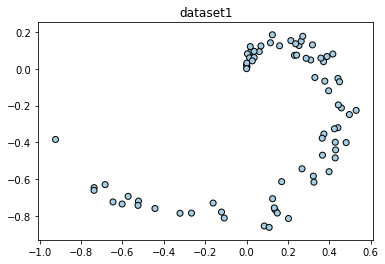

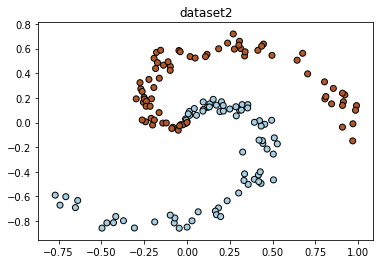

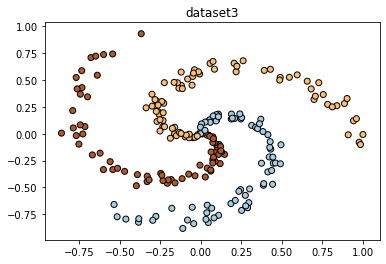

In [116]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def generate_sample_data(num_points = 100, num_class=3):
    '''
    Generate some cool data. Reproduced from [reference witheld]
    
    num_points is num points per class
    '''
    D = 2 
    K = num_class
    X = np.zeros((num_points*K,D)) # data matrix (each row = single example)
    y = np.zeros(num_points*K, dtype=np.long) # class labels
    for j in range(K):
      ix = range(num_points*j,num_points*(j+1))
      r = np.linspace(0.0,1,num_points) # radius
      t = np.linspace(j*4,(j+1)*4,num_points) + np.random.randn(num_points)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
    return {
        'train': {
            'data': X_train,
            'labels': y_train 
        },
        'valid': {
            'data': X_valid,
            'labels': y_valid
        }
    }

def visualize(data :dict, model=None, title:str=""):
    if model is not None:
        plot_step=0.25
        x_min, x_max = data["data"][:, 0].min() - 1, data["data"][:, 0].max() + 1
        y_min, y_max = data["data"][:, 1].min() - 1, data["data"][:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        predictions = []
        for x in np.c_[xx.ravel(), yy.ravel()]:
            _, p, _ = model.forward(x)
            predictions.append(np.argmax(p.value))
        prediction_color = np.array(predictions).reshape(xx.shape)
        cs = plt.contourf(xx, yy, prediction_color, cmap=plt.cm.Paired)
        
    plt.scatter(data["data"][:, 0], data["data"][:, 1], c=data["labels"],edgecolors='black',cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

dataset1 = generate_sample_data(100, 1)
dataset2 = generate_sample_data(100, 2)
dataset3 = generate_sample_data(100, 3)

visualize(dataset1["train"], title="dataset1")
visualize(dataset2["train"], title="dataset2")
visualize(dataset3["train"], title="dataset3")

### Write the `train` function (5 points)

Follow the instructions below to fill in `train`:

In [138]:
from sklearn.metrics import accuracy_score

def train(dataset, model, epochs=1, learning_rate=0.001):
    '''
    train function acccepts a dataset, model, and some hyperparameters. 
    
    Conducts training for the specified number of epochs.
    
    Each epoch is a loop over the training data. 
    
    Call model.forward, model.backward, and model.apply_gradients once for each data point in the dataset
    
    returns:
        a dictionary of
            {
                "loss": the loss reported by the model each time model.forward is called.
                "validation_accyracy": the validation accuracy at the end of each epoch,
                "activations": A list containing:
                  the value of "activations" returned by model.forward. It should only be stored in this list
                  once per epoch (after completing the training loop)
            }
    '''
    history = {
        "loss": [],
        "validation_accuracy": [],
        "activations": []
    }
    
    for epoch in range(1, epochs+1):
        for idx, (sample_x, sample_y) in enumerate(zip(dataset["train"]["data"], dataset["train"]["labels"])):
            '''
            Provide the implementation for the forward, backward, and gradient application steps here.
            Be sure to update the history dictionary.
            '''
            loss, logits, activations = model.forward(sample_x, sample_y)
            history['loss'].append(loss.value)
            model.backward()
            model.apply_gradients(learning_rate)
            list_act = [i.value for i in activations]

            
        history['activations'].append(list_act)
        '''
        Provide the implementation for the validation loop. Do not do training (do not call model.backward)
        
        After your loop, we calculate the accuracy and store it in the history dictionary.
        '''
        predictions = []
        for idx, (sample_x, sample_y) in enumerate(zip(dataset["valid"]["data"], dataset["valid"]["labels"])):
            # YOUR CODE HERE
            loss, logits, activations = model.forward(sample_x, sample_y)
            prediction = np.argmax(logits.value)
            
            predictions.append(prediction)
            
        history["validation_accuracy"].append(accuracy_score(predictions, dataset["valid"]["labels"]))
    return history

### Simple Convergence Test with `dataset1` (2 pt)

To test if things converge, we will use `dataset1`, which only has 1 class, to ensure our `train` function is working. We expect the neural network should converge rapidly to 0-loss using a reasonable learning rate.

In the following cell, create a `Neural Network` model with a modest `layer_widths` parameter, `[5,3]`. 

- Call the `train` function of the model on `dataset1` in a loop, using a different learning rate for each iteration. The values you should use are `1.0, 0.1, 0.001`. Use only 1 epoch.
- Plot the history of the loss for each learning rate (plot all three lines on the same plot).
- Use the `visualize` given for you above to plot the visualization of the trained model against the training data. You should see the entire plan is classified as 1 class.

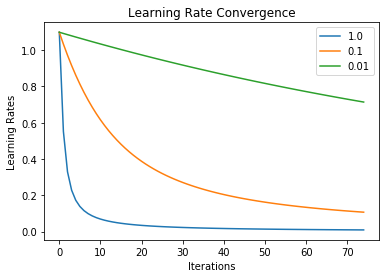

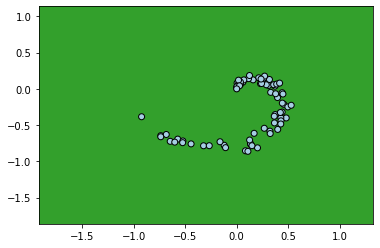

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline


learning_rates = [1.0, 0.1, 0.01]

histories = {
    '1.0':[],
    '0.1':[],
    '0.01':[]
}

for i in learning_rates:
    history = train(dataset1, NeuralNetwork(layer_widths = [5,3]), epochs=1, learning_rate=i)
    histories[str(i)].append(history["loss"])
    

for i in histories:
    temp = np.array([])
    for j in histories[i]:
        temp = np.append(temp, j)
        
    
    x = np.arange(0, len(temp))
    plt.plot(x, temp, label=str(i))

    

plt.xlabel("Iterations")
plt.ylabel("Learning Rates")
plt.title("Learning Rate Convergence")
plt.legend()
plt.show()

model = NeuralNetwork(layer_widths = [5,3])
history = train(dataset1,model,epochs=1,learning_rate=1.0)

visualize(dataset1["train"], model)


### Train the Models on the More Difficult dataset2 and dataset3 (5 pts)

Write code below to train a NeuralNetwork for each dataset2 and dataset3 

    - Train a maximum of 5 different models, for a maximum of 10 epochs each.
    
    - Your models should vary in the layer_widths parameter using a different combination of total number of layers and width of the largest layer. Good values to try might keep the total width constant, but increase the number of layers, such as [10]*10+[3] or very wide, shallow networks, like [100,100,3].
    
    - Graph 1: Plot the loss history returned by the train function for each model
    
    - Graph 2: Plot the validation accuracy history returned by the `train` function for each model.
    
    - Graph 3: Plot the mean and standard deviation of the activations. The x axis will be layer number, and the y axis will be mean or standard deviation. You should have 1 line per epoch. 
    
    - Graph 4: Use the visualize function provided to visualize the model against the training data
    
Obviously, this is going to produce many plots for 5 possible models. Try to keep things compact by using subplots as much as possible and comining figures where appropriate.

For deeper networks, you will need to change the default initialization. One method is provided for you.

In the Markdown cell below, comment on your findings regarding the following:
1. How does depth or width of the model affect trainability (the ability of the model to converge in a reasonable number of epochs). Does using the provided initialization help train deeper models? Why or why not?
2. How does depth or width affect performance (by looking at validation accuracy).

Dataset 2
Dataset 3


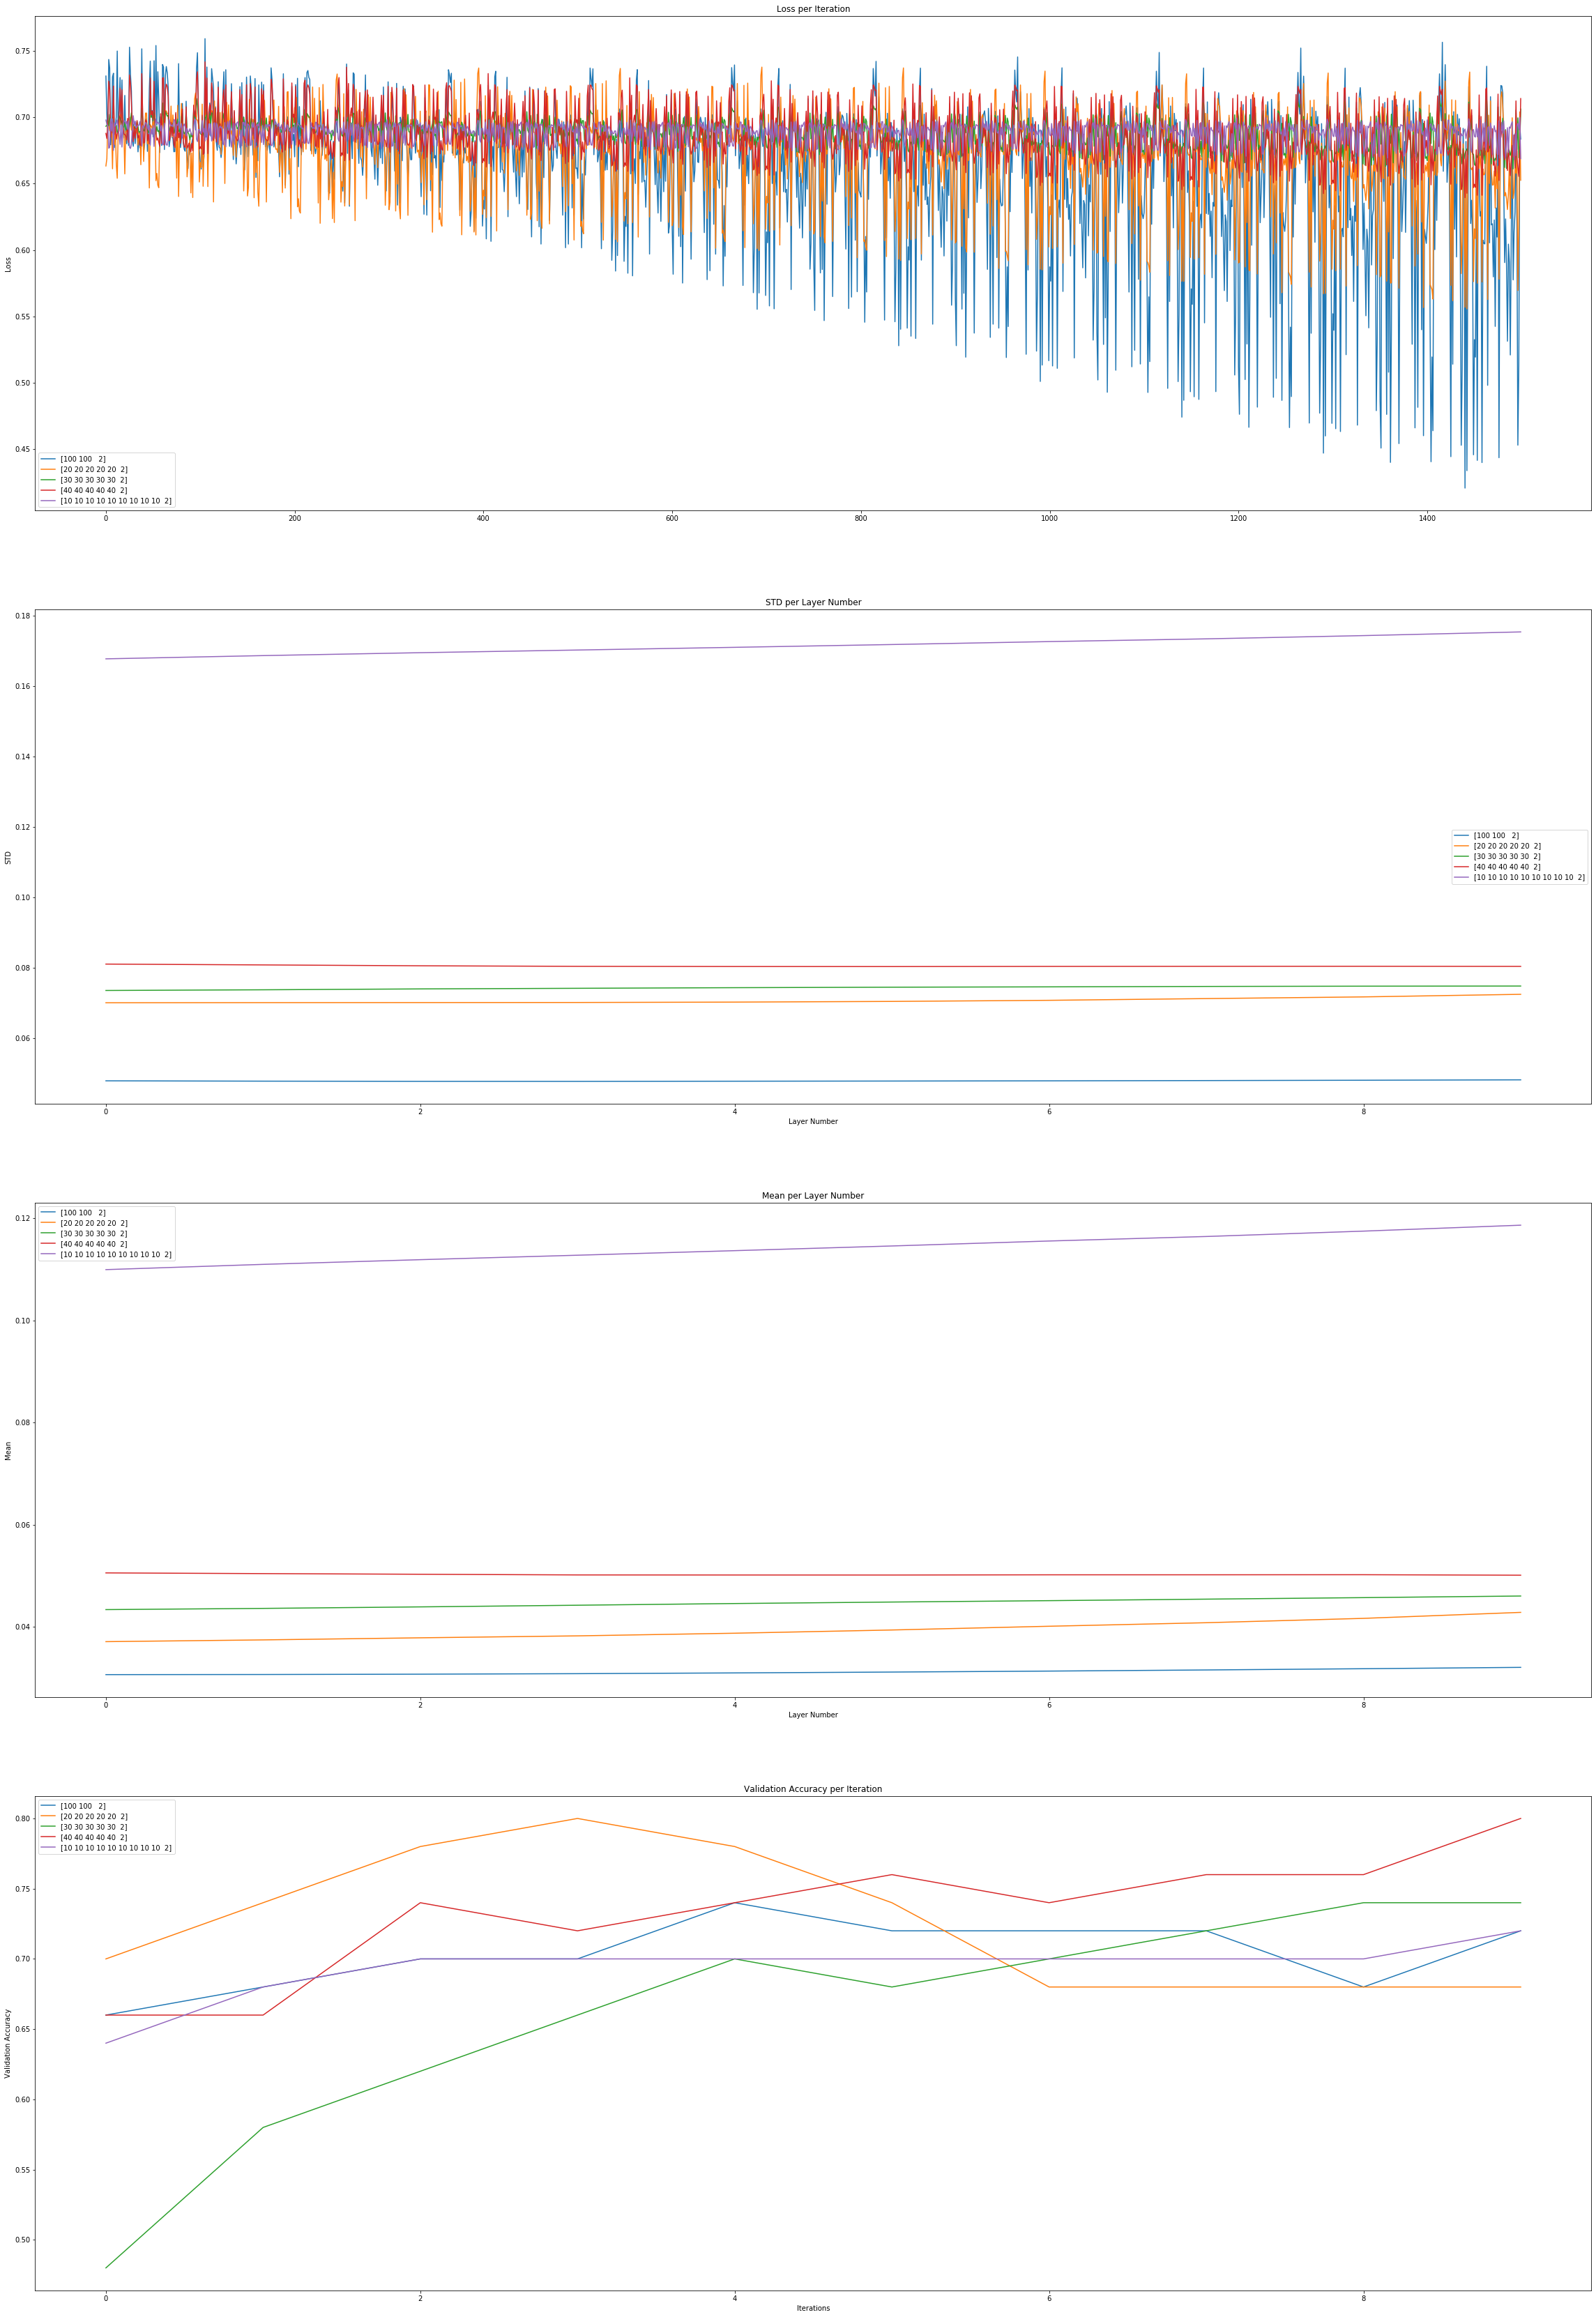

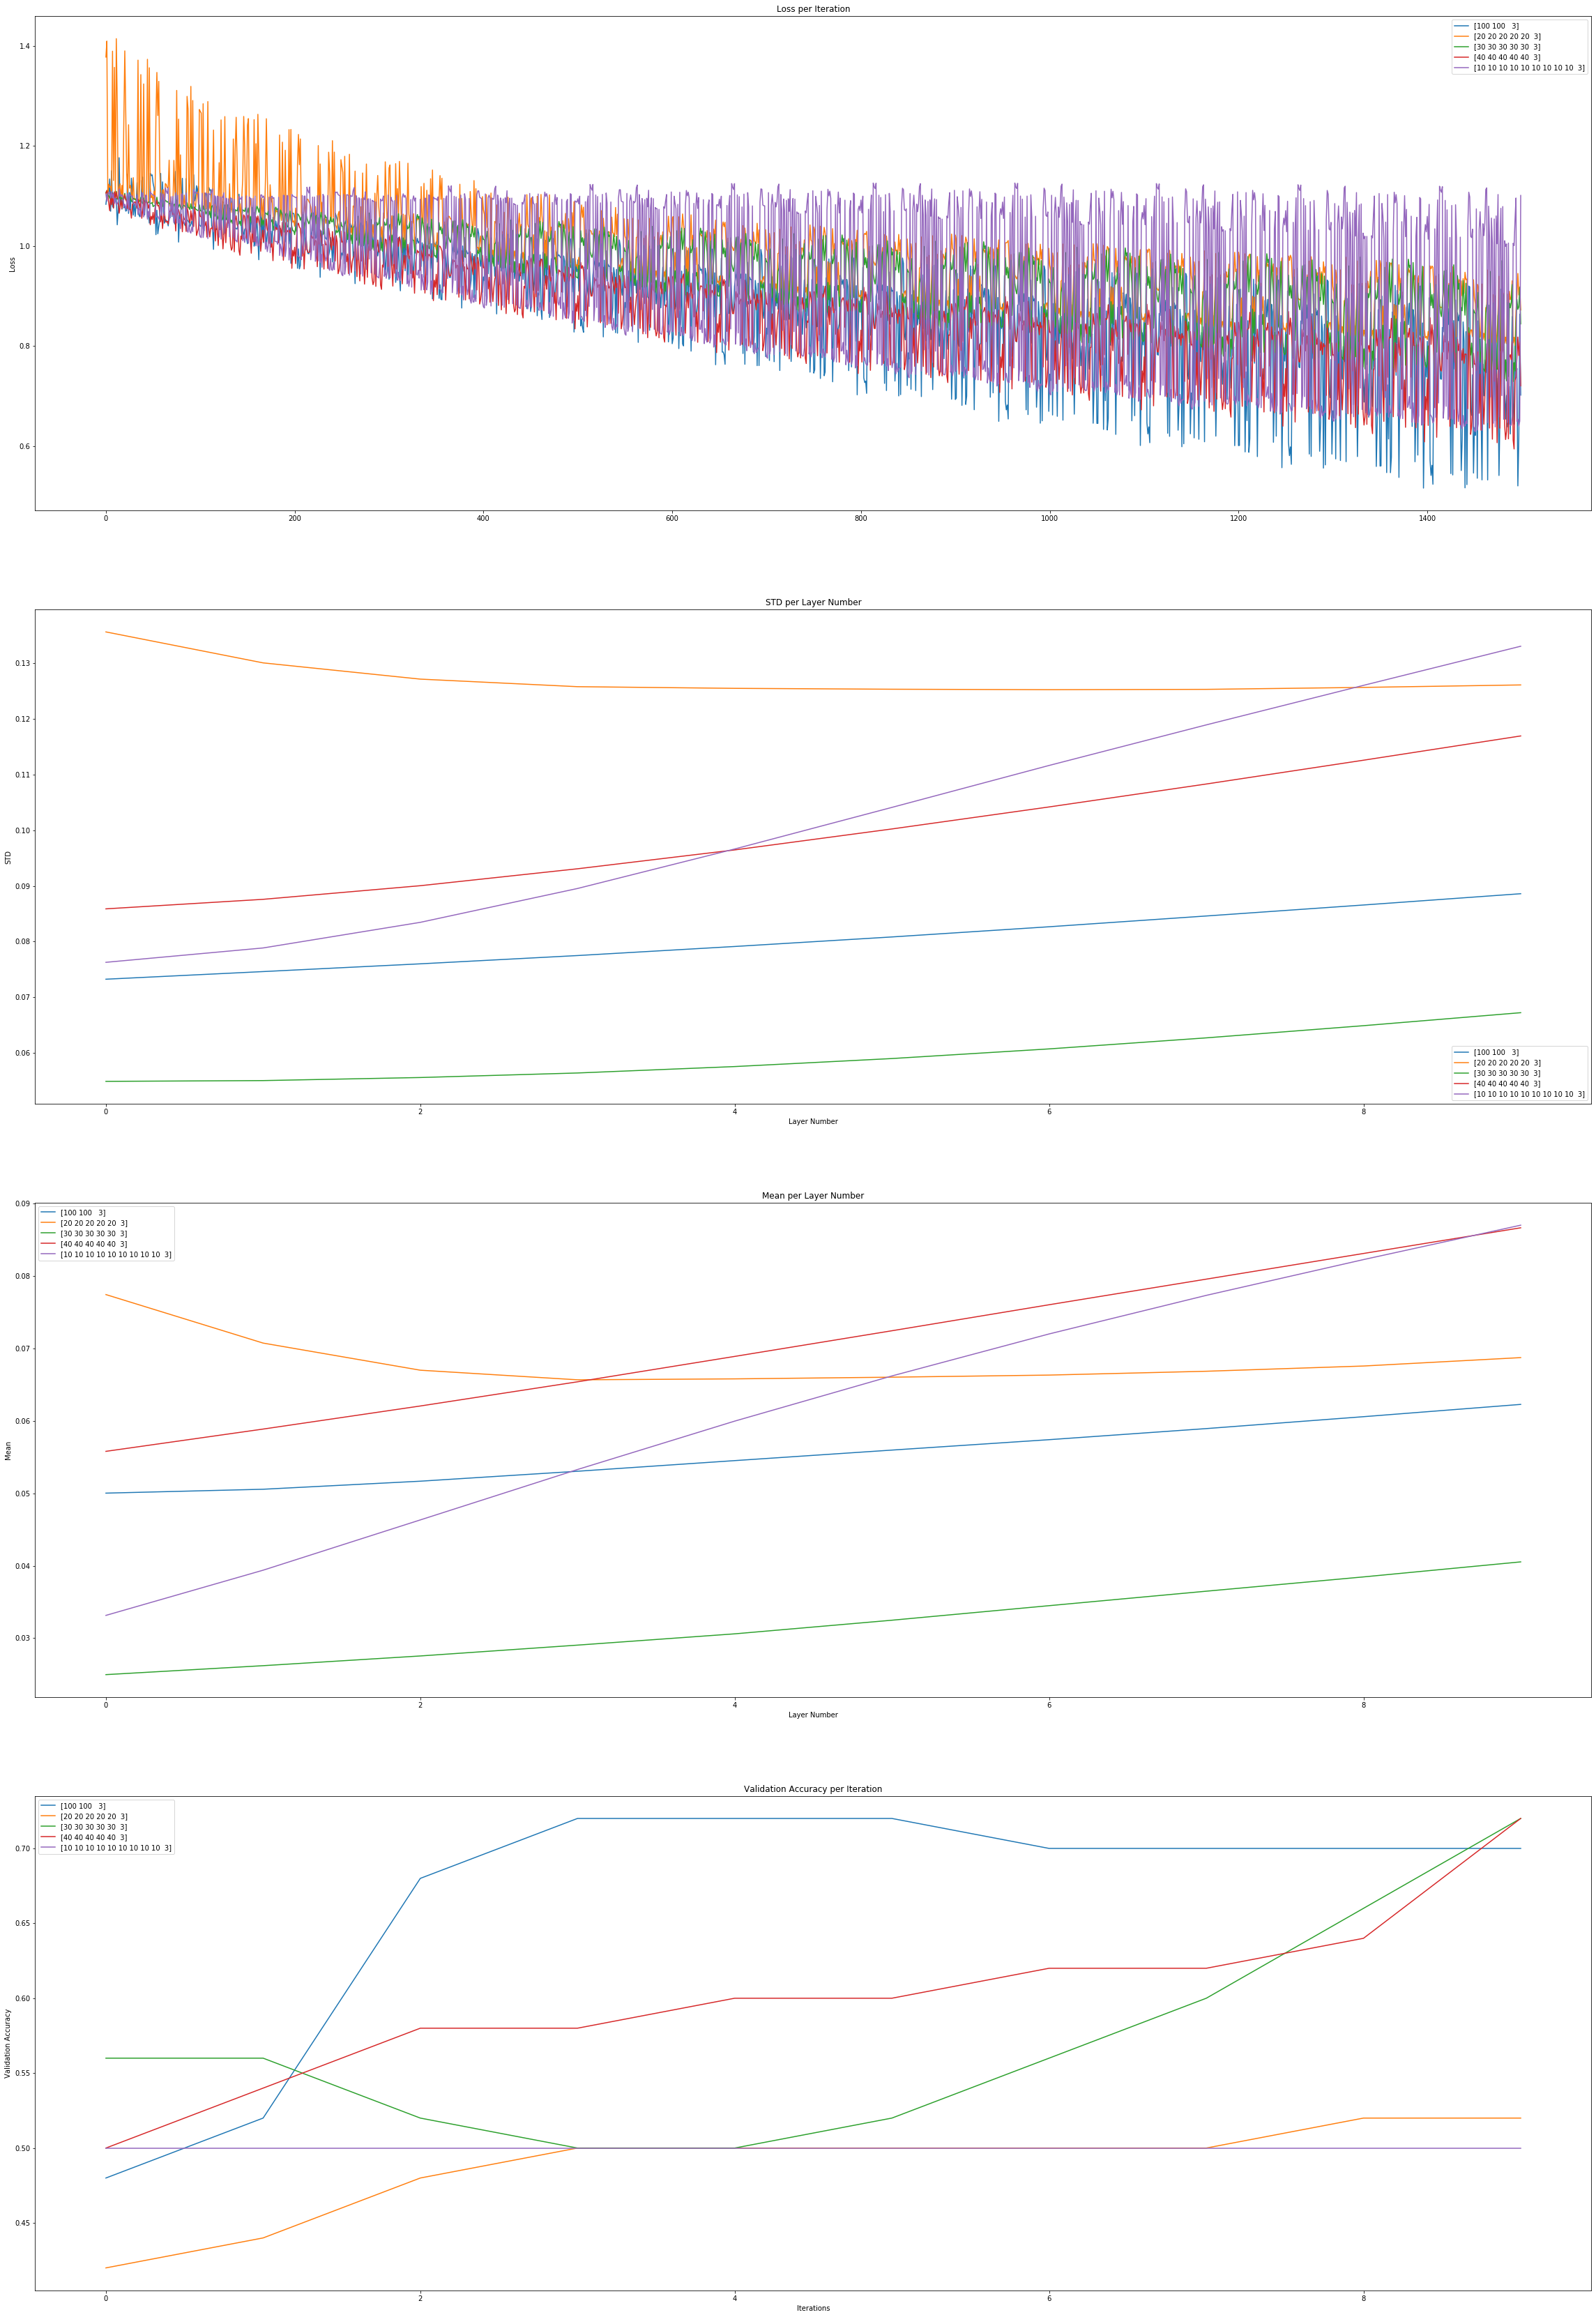

In [207]:
# import numpy as np
import matplotlib.pyplot as plt

#---------------------dataset2---------------------
print("Dataset 2")

def normal_init(model):
    for w in model.weights:
        normval = np.sqrt(2/(w.value.shape[0]+w.value.shape[1]))
        w.value = np.random.randn(*w.value.shape)*normval
    for b in model.biases:
        b.value = np.zeros_like(b.value)

shallow = np.array([100,100,2])
deep = np.array([10,10,10,10,10,10,10,10,10,2])
middle1 = np.array([20,20,20,20,20,2])
middle2 = np.array([30,30,30,30,30,2])
middle3 = np.array([40,40,40,40,40,2])

layers = np.array([shallow, middle1, middle2, middle3, deep])

fig, ax = plt.subplots(4, 1, figsize=(40,60))

for count, ele in enumerate(layers):
    model = NeuralNetwork(layer_widths = ele)
    normal_init(model)
    history = train(dataset2,model, epochs=10, learning_rate=.001)
    
    
    histories = history["loss"]
    accuracy = history["validation_accuracy"]
    activations = history["activations"]
    
    
    x = np.arange(0, len(histories))
    ax[0].plot(x, histories, label=str(ele))
    ax[0].set_ylabel("Iterations")
    ax[0].set_ylabel("Loss")
    ax[0].set_title("Loss per Iteration")
    ax[0].legend()
    
    standard_dev = np.array([])
    means = np.array([])
    len_act = range(len(activations))
    for i in activations:
        standard_dev = np.append(standard_dev, np.std(i))
        means = np.append(means, np.mean(i))
    

    ax[1].plot(len_act, standard_dev, label=str(ele)) 
    ax[1].set_xlabel("Layer Number")
    ax[1].set_ylabel("STD")
    ax[1].set_title("STD per Layer Number")
    ax[1].legend()
        
    ax[2].plot(len_act, means, label=str(ele)) 
    ax[2].set_xlabel("Layer Number")
    ax[2].set_ylabel("Mean")
    ax[2].set_title("Mean per Layer Number")
    ax[2].legend()
    
    ax[3].plot(len_act, accuracy, label=str(ele)) 
    ax[3].set_xlabel("Iterations")
    ax[3].set_ylabel("Validation Accuracy")
    ax[3].set_title("Validation Accuracy per Iteration")
    ax[3].legend()
        



#---------------------dataset3---------------------
print("Dataset 3")

def normal_init(model):
    for w in model.weights:
        normval = np.sqrt(2/(w.value.shape[0]+w.value.shape[1]))
        w.value = np.random.randn(*w.value.shape)*normval
    for b in model.biases:
        b.value = np.zeros_like(b.value)

shallow = np.array([100,100,3])
deep = np.array([10,10,10,10,10,10,10,10,10,3])
middle1 = np.array([20,20,20,20,20,3])
middle2 = np.array([30,30,30,30,30,3])
middle3 = np.array([40,40,40,40,40,3])

layers = np.array([shallow, middle1, middle2, middle3, deep])

fig, ax = plt.subplots(4, 1, figsize=(40,60))

for count, ele in enumerate(layers):
    model = NeuralNetwork(layer_widths = ele)
    normal_init(model)
    history = train(dataset2,model, epochs=10, learning_rate=.001)
    
    
    histories = history["loss"]
    accuracy = history["validation_accuracy"]
    activations = history["activations"]
    
    
    x = np.arange(0, len(histories))
    ax[0].plot(x, histories, label=str(ele))
    ax[0].set_ylabel("Iterations")
    ax[0].set_ylabel("Loss")
    ax[0].set_title("Loss per Iteration")
    ax[0].legend()
    
    standard_dev = np.array([])
    means = np.array([])
    len_act = range(len(activations))
    for i in activations:
        standard_dev = np.append(standard_dev, np.std(i))
        means = np.append(means, np.mean(i))
    

    ax[1].plot(len_act, standard_dev, label=str(ele)) 
    ax[1].set_xlabel("Layer Number")
    ax[1].set_ylabel("STD")
    ax[1].set_title("STD per Layer Number")
    ax[1].legend()
        
    ax[2].plot(len_act, means, label=str(ele)) 
    ax[2].set_xlabel("Layer Number")
    ax[2].set_ylabel("Mean")
    ax[2].set_title("Mean per Layer Number")
    ax[2].legend()
    
    ax[3].plot(len_act, accuracy, label=str(ele)) 
    ax[3].set_xlabel("Iterations")
    ax[3].set_ylabel("Validation Accuracy")
    ax[3].set_title("Validation Accuracy per Iteration")
    ax[3].legend()
        

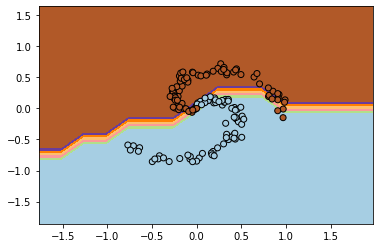

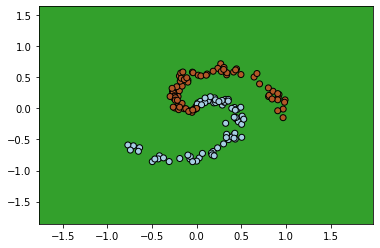

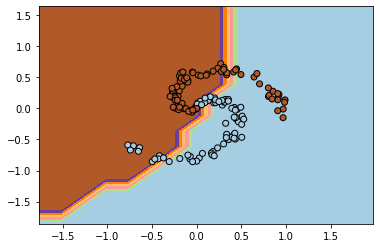

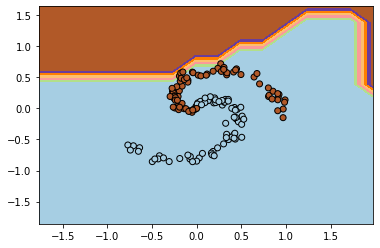

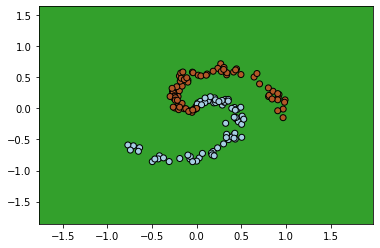

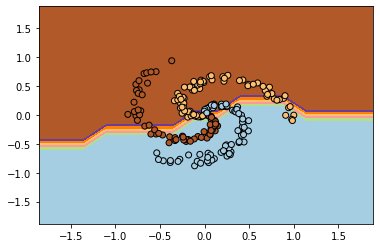

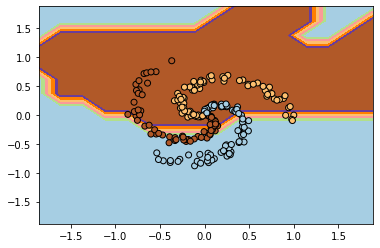

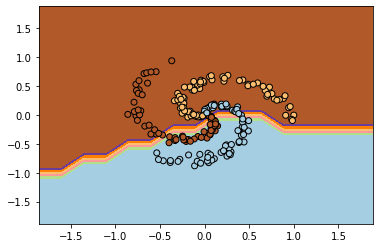

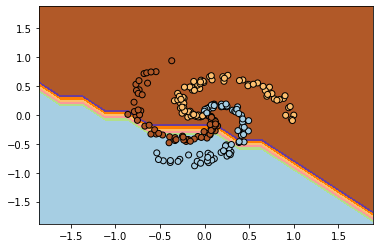

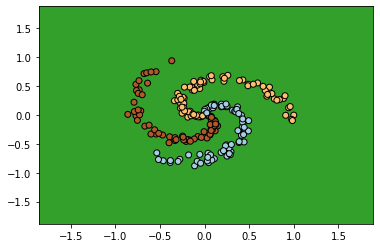

In [208]:
shallow = np.array([100,100,2])
deep = np.array([10,10,10,10,10,10,10,10,10,2])
middle1 = np.array([20,20,20,20,20,2])
middle2 = np.array([30,30,30,30,30,2])
middle3 = np.array([40,40,40,40,40,2])


for count, ele in enumerate(layers):
    model = NeuralNetwork(layer_widths = ele)
    normal_init(model)
    history = train(dataset2,model, epochs=10, learning_rate=.001)
    visualize(dataset2["train"], model)
    
shallow = np.array([100,100,3])
deep = np.array([10,10,10,10,10,10,10,10,10,3])
middle1 = np.array([20,20,20,20,20,3])
middle2 = np.array([30,30,30,30,30,3])
middle3 = np.array([40,40,40,40,40,3])


for count, ele in enumerate(layers):
    model = NeuralNetwork(layer_widths = ele)
    normal_init(model)
    history = train(dataset2,model, epochs=10, learning_rate=.001)
    visualize(dataset3["train"], model)

In the Markdown cell below, comment on your findings regarding the following:

How does depth or width of the model affect trainability (the ability of the model to converge in a reasonable number of epochs). 

### for dataset 2 - 
The shallower model allowed it to converge easier. Amount of nodes did not appear to make a difference.

### for dataset 3 - 
The shallower model allowed it to converge easier. More nodes also helped with convergence. 



Does using the provided initialization help train deeper models? Why or why not?

### for datasets 2 and 3 - 
Yeah, I had to use it to even allow it to get close to convergence


How does depth or width affect performance (by looking at validation accuracy).

### for datasets 2 and 3 - 
less depth increased preformance while a higher width helped increase it too
